In [24]:
import pandas as pd
import calendar
import numpy as np
import datetime
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [33]:
file_directory = os.getcwd()
print(file_directory)

C:\Users\alena\OneDrive\Documents\DATA 6505\Real-Estate-Market-CT\All Workbooks


In [34]:
os.chdir(file_directory)

Loading CT_house_sizes dataset

In [35]:
house_size = 'CT house sizes_sold_2001_2020.csv'
house_size_path = os.path.join('DataSets', house_size)

In [36]:
house_size_path

'DataSets\\CT house sizes_sold_2001_2020.csv'

In [42]:
dtype_house_size = {'status': str,
    'bed': float,
    'bath': float,
    'acre_lot': float,
    'city': str,
    'state': str,
    'zip_code': float,
    'house_size': float,
    'prev_sold_date': str,
    'price': float}

In [43]:
house_size_df = pd.read_csv(house_size_path, dtype=dtype_house_size)

After loading the dataset, investigating the dataset shape and missing values

In [45]:
house_size_df.shape

(43121, 10)

In [46]:
# missing value
house_size_df.isnull().sum()

status               0
bed                622
bath               656
acre_lot          6531
city                 0
state                0
zip_code             0
house_size           0
prev_sold_date       0
price                0
dtype: int64

We can see that our dataset has bed, bath and acre_lot columns with missing data in it.

We should drop N/A's for bed and bath, so these records don't impact our statistical metrics.
We will consider acre_lot N/A's going forward if needed. 

In [49]:
house_size_df.dropna(subset=["bed","bath"],inplace=True)

In [50]:
house_size_df.isnull().sum()

status               0
bed                  0
bath                 0
acre_lot          6517
city                 0
state                0
zip_code             0
house_size           0
prev_sold_date       0
price                0
dtype: int64

In [51]:
# shape after cleaning the dataset
house_size_df.shape

(42424, 10)

Now with a cleaner dataset we can calculate **the average price per sq ft per each town**.

**Note: the dataset has it as 'city' column.**

In [52]:
average_price_per_city = house_size_df.groupby('city')['price'].mean()
average_size_per_city = house_size_df.groupby('city')['house_size'].mean()
average_price_per_sqft = average_price_per_city / average_size_per_city
average_price_per_sqft.round(2)

city
Andover          335.34
Ansonia          184.77
Ashford          184.85
Avon             216.77
Barkhamsted      181.83
                  ...  
Windsor Locks    164.36
Wolcott          182.92
Woodbridge       224.24
Woodbury         234.89
Woodstock        968.96
Length: 171, dtype: float64

In [53]:
formatted_average_price_per_sqft = average_price_per_sqft.map('${:,.2f}'.format)
formatted_average_price_per_sqft

city
Andover          $335.34
Ansonia          $184.77
Ashford          $184.85
Avon             $216.77
Barkhamsted      $181.83
                  ...   
Windsor Locks    $164.36
Wolcott          $182.92
Woodbridge       $224.24
Woodbury         $234.89
Woodstock        $968.96
Length: 171, dtype: object

In [55]:
most_expensive_sqft = average_price_per_sqft.idxmax()
least_expensive_sqft = average_price_per_sqft.idxmin()

In [58]:
# this is per sq ft only
most_expensive_sqft

'Woodstock'

In [59]:
least_expensive_sqft

'Storrs'

We can see that Woodstock has the highest average price per sq ft and Storrs the lowest. The Town Of Woodstock located in the northeastern area of Connecticut and on the Massachusetts border. 
However, we should account that this doesn't mean the average sale price per town. Many other rich areas in CT have massive houses.

Now let's review average sale price per each town:

In [60]:
average_price_per_city = house_size_df.groupby('city')['price'].mean()
average_price_per_city.round(2)

city
Andover           334000.00
Ansonia           278733.60
Ashford           273980.85
Avon              611394.28
Barkhamsted       415521.74
                    ...    
Windsor Locks     224032.20
Wolcott           341714.58
Woodbridge        649502.82
Woodbury          720169.92
Woodstock        2681968.31
Name: price, Length: 171, dtype: float64

In [61]:
# now we have most and least expensive towns per aver price
most_expensive_town = average_price_per_city.idxmax()
least_expensive_town = average_price_per_city.idxmin()

In [62]:
most_expensive_town

'Greenwich'

In [63]:
least_expensive_town

'Storrs'

We can see that the most expesive town to live in is Greenwich based on the dataset provided.
The least expensive town is Storrs. 

In [64]:
top_10_most_expensive = average_price_per_city.nlargest(10)
top_10_least_expensive = average_price_per_city.nsmallest(10)

In [65]:
top_10_most_expensive.round(2)

city
Greenwich     4670063.80
New Canaan    3341620.78
Westport      2941201.31
Riverside     2770303.03
Woodstock     2681968.31
Kent          2615972.00
Redding       2398098.41
Washington    2302844.83
Salisbury     2191190.48
Roxbury       1801547.95
Name: price, dtype: float64

In [66]:
top_10_least_expensive.round(2)

city
Storrs            73612.90
Windham          180910.59
Norwich          190970.40
Eastford         210618.75
Torrington       217656.16
Waterbury        220334.82
East Hartford    222167.81
Windsor Locks    224032.20
Plainville       225811.62
Hartford         227645.00
Name: price, dtype: float64

The above are top 10 most and least expensive towns per its average house price sold during 2001-2020.

Let's make it more visual using matplotlip package.
The most expesive houses are shown in millions and the least expensive are in thousands of dollars. 

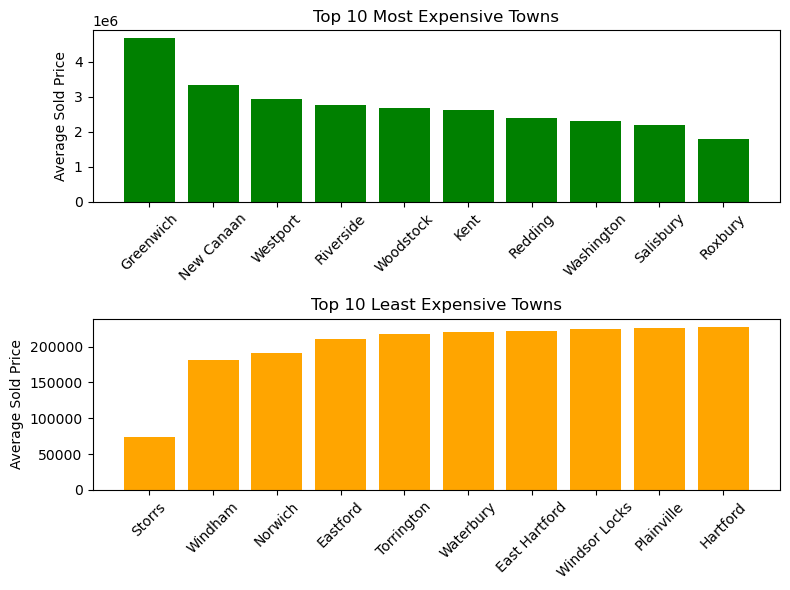

In [67]:
import matplotlib.pyplot as plt
average_price_per_city = house_size_df.groupby('city')['price'].mean()

top_10_most_expensive = average_price_per_city.nlargest(10)
top_10_least_expensive = average_price_per_city.nsmallest(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# most expensive
axes[0].bar(top_10_most_expensive.index, top_10_most_expensive.values, color='green')
axes[0].set_title('Top 10 Most Expensive Towns')
axes[0].set_ylabel('Average Sold Price')
axes[0].tick_params(axis='x', rotation=45) 

# least expensive
axes[1].bar(top_10_least_expensive.index, top_10_least_expensive.values, color='orange')
axes[1].set_title('Top 10 Least Expensive Towns')
axes[1].set_ylabel('Average Sold Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Here are some more statistical data for curiosity:

In [68]:
average_beds_per_town = house_size_df.groupby('city')['bed'].mean()
average_beds_per_town.round(1)

city
Andover          3.0
Ansonia          3.5
Ashford          3.0
Avon             3.4
Barkhamsted      3.0
                ... 
Windsor Locks    3.0
Wolcott          3.3
Woodbridge       3.7
Woodbury         3.5
Woodstock        3.5
Name: bed, Length: 171, dtype: float64

In [89]:
towns_highest_beds = house_size_df.groupby('city')['bed'].sum().idxmax()
towns_lowest_beds = house_size_df.groupby('city')['bed'].sum().idxmin()

In [91]:
towns_highest_beds

'Hartford'

In [92]:
towns_lowest_beds

'Union'